In [1]:
import cv2
import os
import time
import numpy as np
from scipy import ndimage, signal
from matplotlib import pyplot as plt
import shutil

In [2]:
kSC = np.array([[-1 / 8, -1 / 8, -1 / 8],  # from class material
                [-1 / 8, 1, -1 / 8],
                [-1 / 8, -1 / 8, -1 / 8]])

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img
def toGray(im, im_L=10, im_W=10, contrast=1.0):
    # normalize
    gray = np.zeros([im_L, im_W])
    for j in range(im_L):
        for i in range(im_W):
            gray[j][i] = max(im[j][i]) * contrast
    gray = convert(gray, 0, 255, np.uint8)
    return gray
def threshold(frame):
    # for j in range(len(frame)):
    #     for i in range(len(frame[0])):
    #         print(frame[j][i])
    #
    # print("---------------------------------")
    out = np.full_like(frame, 128)
    out[frame < -4] = 0
    # out[frame > 4] = 255
    return out
def SpacialContrast(imGray):
    conv_gray = signal.convolve2d(imGray, kSC, 'same')
    # print(np.int32(conv_gray))
    fSCgray = np.array(threshold(conv_gray), dtype=np.uint8)
    return fSCgray

In [3]:
training_set = np.empty([120*9+1, 10, 10])
src_set = np.empty(shape=120*9+1, dtype=object)
baseDir = 'ShapeGroups'
idx = 0
for filename in os.listdir(baseDir):
    folder = baseDir + '/' + filename
    for imagepath in os.listdir(folder):
        imagepathFull = folder + '/' + imagepath
        training_set[idx] = toGray(cv2.imread(imagepathFull))
        src_set[idx] = imagepathFull
        # print(training_set[idx])
        idx += 1

IndexError: index 1081 is out of bounds for axis 0 with size 1081

In [ ]:
for sample, dir in zip(training_set, src_set):
    plt.imshow(sample)
    plt.show()
    print(dir)
    time.sleep(.01)

In [ ]:
cv2.imshow("", cv2.resize(training_set[0], [50, 50], interpolation=cv2.INTER_LINEAR))

cv2.waitKey(0)

In [ ]:
# testing some maths
sh4_22 = training_set[1]
sh0_01 = training_set[2]
sh0_22 = training_set[3]

print(sum(sum(abs(sh4_22.astype(int) - sh0_22.astype(int)))))
print(sum(sum(abs(sh4_22.astype(int) - sh0_01.astype(int)))))

In [ ]:
fSC4_22 = SpacialContrast(sh4_22)
fSC0_01 = SpacialContrast(sh0_01)
fSC0_22 = SpacialContrast(sh0_22)

print(sum(sum(abs(fSC4_22.astype(int)/255 - fSC0_01.astype(int)/255))))
print(sum(sum(abs(fSC4_22.astype(int)/255 - fSC0_22.astype(int)/255))))
print(sum(sum(abs(fSC0_22.astype(int)/255 - fSC0_01.astype(int)/255))))

fig = plt.figure()
fig.add_subplot(2, 3, 1)
plt.imshow(fSC4_22)

fig.add_subplot(2, 3, 2)
plt.imshow(fSC0_01)

fig.add_subplot(2, 3, 3)
plt.imshow(fSC0_22)

fig.add_subplot(2, 3, 4)
plt.imshow(abs(fSC4_22.astype(int)/255 - fSC0_01.astype(int)/255))

fig.add_subplot(2, 3, 5)
plt.imshow(abs(fSC4_22.astype(int)/255 - fSC0_22.astype(int)/255))

fig.add_subplot(2, 3, 6)
plt.imshow(abs(fSC0_22.astype(int)/255 - fSC0_01.astype(int)/255))
plt.show()

In [ ]:
fSC0_20 = toGray(cv2.imread("ShapeGroups/shape5/0_20.png"))
fSC4_02 = toGray(cv2.imread("ShapeGroups/shape15/4_12.png"))

print(sum(sum(abs(fSC0_20.astype(int)/255 - fSC4_02.astype(int)/255))))
plt.imshow((abs(fSC0_20.astype(int)/255 - fSC4_02.astype(int)/255)))
plt.show()

In [ ]:
# clean dataset
# toFind = ["0_11", "103_12", "105_02", "98_00", "87_12",
#           "74_02", "65_11", "63_10", "62_02", "52_00",
#           "38_22", "2_11", "21_02", "17_22", "115_01",
#           "112_11", "111_10", "107_02"]
# toMove = "ShapeGroups/shape5"
toFind = ["5_22", "4_00"]
toMove = "ShapeGroups/shape7"
idx = 0
for sample in toFind:
    im = "shape7/" + sample
    for idx in range(len(src_set)):
        dir = src_set[idx]
        if dir.find(im) != -1:
            print(dir)
            # plt.imshow(training_set[idx])
            # plt.show()
            # shutil.move(dir, toMove)

In [3]:
# get dataset!
image_sets = ['train.large', 'train.med', 'train.small', 'train.tiny']
training_image_files = './exp_shapes/shapes_dataset/%s.input.npy'
training_images_list = []

for image_set in image_sets:
    training_images_list.append(np.load(training_image_files % image_set))

training_images = np.concatenate(training_images_list)

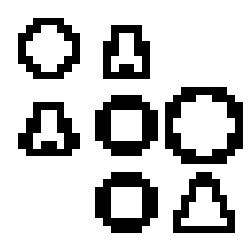

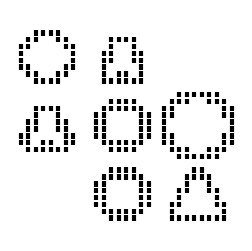

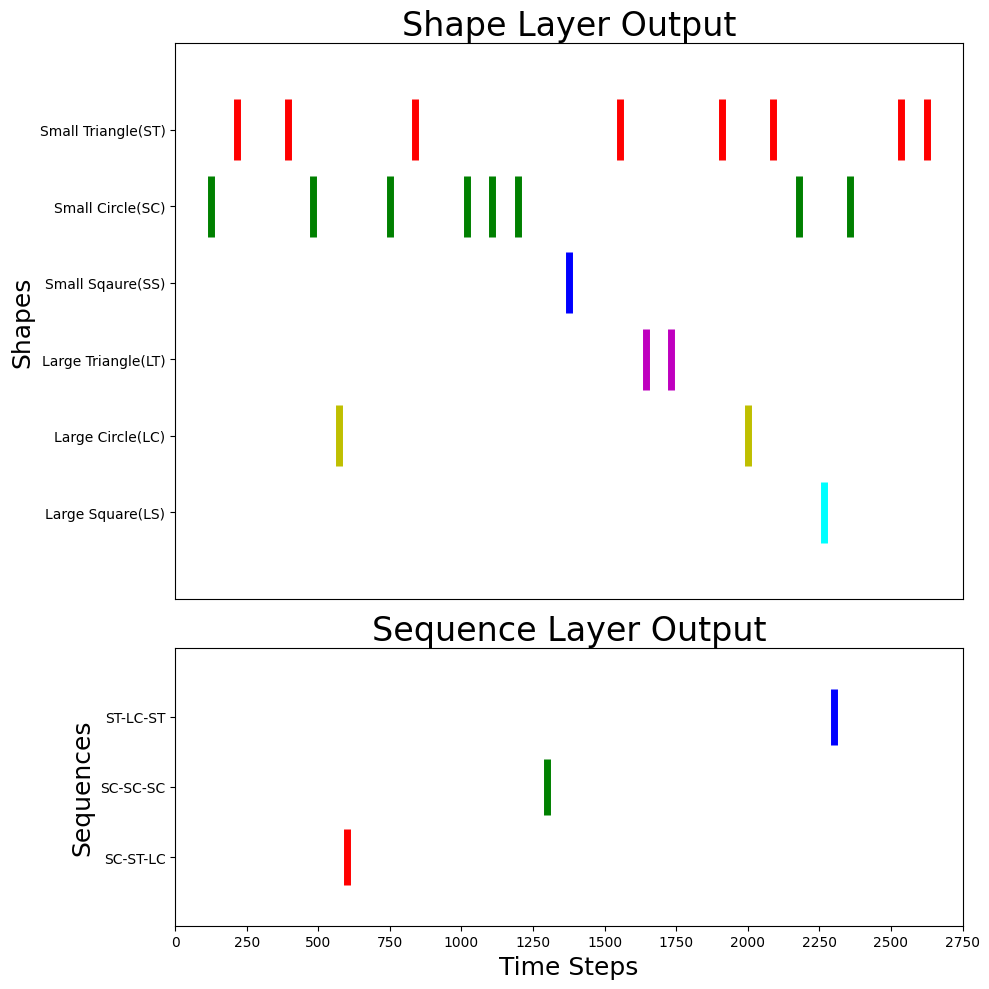

In [57]:
from matplotlib import gridspec
# 32,64,73,74
sample = toGray(training_images[1],im_L=30, im_W=30)
# sampleflat = SpacialContrast(np.concatenate((sample[0:10, :], sample[10:20, ], sample[20:30, :]), axis=1))
sampleflat = SpacialContrast(sample)
ax = plt.axes()
plt.imshow(sampleflat, cmap='gray')
ax.axis('tight')
ax.axis('off')
fig = plt.gcf()
fig.set_size_inches(3, 3)
# fig.savefig('fig samples/sample2.svg', dpi=100)
# ax = plt.axes()
# ax.set_facecolor('white')

time_step = 100
spikes = []
for col in range(np.shape(sampleflat)[0]):
    row_spikes = []
    for row in range(np.shape(sampleflat)[1]):
        if sampleflat[col][row] == 0:
            row_spikes.append(row*time_step)
        else:
            sampleflat[col][row] = 128
    spikes.append(row_spikes)

fig, ax = plt.subplots()
plt.eventplot(spikes, linelengths=.8, linewidths=3, colors=['black'])
ax.invert_yaxis()
ax.set_facecolor('white')
ax.set_yticks(range(10))
ax.axis('tight')
ax.axis('off')
fig = plt.gcf()
fig.set_size_inches(3, 3)
plt.show()
# fig.savefig("fig samples/spikes3.svg")

ch0 = [200, 400, 900, 1700, 2100, 2300, 2800, 2900]
ch1 = [100, 500, 800, 1100, 1200, 1300, 2400, 2600]
ch2 = [1500]
ch3 = [1800, 1900]
ch4 = [600, 2200]
ch5 = [2500]
ch_sh = [ch0, ch1, ch2, ch3, ch4, ch5]


ch0 = [600]     # small triangle, small circle, big circle
ch1 = [1300]    # small circle, small circle, small circle
ch2 = [2300]    # small triangle, big circle, small triangle

ch_seq = [ch0, ch1, ch2]

# fig, ax = plt.subplots()
# plt.eventplot(ch, linelengths=.8, linewidths=5, colors=['r','g','b','m','y','cyan'])
# plt.title('Shape Recognition Output', fontsize= 24)
# plt.ylabel('Shapes', fontsize=18)
# ax.invert_yaxis()
# # ax.set_facecolor('white')
# ax.set_yticks(range(10))
# ax.axis('tight')
# # ax.axis('off')
# fig = plt.gcf()
# fig.set_size_inches(5, 5)
# ax.set_xticks(range(0, 3000, 250))
# plt.xticks([])
# plt.show()
# fig.savefig("layer1_out.svg")



# fig, ax = plt.subplots()
# plt.eventplot(ch, linelengths=.8, linewidths=5, colors=['r','g','b'])
# plt.title('Sequence Recognition Output', fontsize= 24)
# plt.ylabel('Sequences', fontsize=18)
# ax.invert_yaxis()
# # ax.set_facecolor('white')
# ax.set_yticks(range(3))
# ax.set_xticks(range(0, 3000, 500))
# # ax.axis('tight')
# # ax.axis('off')
# fig = plt.gcf()
# fig.set_size_inches(5, 5)
# plt.show()
# fig.savefig("layer2_out.svg")

fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax0 = plt.subplot(gs[1])
ax0.eventplot(ch_seq, linelengths=.8, linewidths=5, colors=['r','g','b'])
ax0.set_title('Sequence Layer Output', fontsize= 24)
ax0.set_ylabel('Sequences', fontsize=18)
ax.invert_yaxis()
ax0.set_yticks(range(3))
labels = [item.get_text() for item in ax0.get_yticklabels()]
labels = ['SC-ST-LC', 'SC-SC-SC', 'ST-LC-ST']
ax0.set_yticklabels(labels)
ax0.set_xticks(range(0, 3000, 250))
ax0.set_xlabel('Time Steps', fontsize= 18)



ax1 = plt.subplot(gs[0])
ax1.eventplot(ch_sh, linelengths=.8, linewidths=5, colors=['r','g','b','m','y','cyan'])
ax1.set_title('Shape Layer Output', fontsize= 24)
ax1.set_ylabel('Shapes', fontsize=18)
ax1.invert_yaxis()
# ax.set_facecolor('white')
ax1.set_yticks(range(6))
labels = [item.get_text() for item in ax1.get_yticklabels()]
labels = ['Small Triangle(ST)', 'Small Circle(SC)', 'Small Sqaure(SS)', 'Large Triangle(LT)', 'Large Circle(LC)', 'Large Square(LS)']
ax1.set_yticklabels(labels)
# ax1.axis('tight')
# ax0.legend(['ST-SC-BC', 'SC-SC-SC', 'ST-BC-ST'],loc='upper left')
# ax.axis('off')
ax.set_xticks(range(0, 3000, 250))
plt.xticks([])

fig.set_size_inches(10, 10)
plt.tight_layout()
fig.savefig("both_out.svg")

In [5]:
cv2.imwrite("sample0SC.png", SpacialContrast(toGray(im=training_images[0], im_L=30, im_W=30)))

[[  0   0   0   0   0   0   0   0   0   0   0   0  -4 -17 -29 -29 -17  -4
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  -2  -5  -5  -2   0   0   0   0 -14 -50 -54 -11 -11 -55 -50
  -14   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 -19 -16 -16 -19   0   0   0  -5 -51  12  91  66  66  91  10
  -51  -5   0   0   0   0   0   0   0   0   0   0]
 [  0   0  -2 -52  50  49 -52  -2   0   0 -19 -47  92  18   0   0  18  92
  -49 -18   0   0   0   0   0   0   0   0   0   0]
 [  0   0 -19 -76  94  96 -74 -19   0   0 -33  -4  62   0   0   0   0  63
   -5 -32   0   0   0   0   0   0   0   0   0   0]
 [  0  -2 -51   6  49  48   4 -52  -2   0 -32  -4  63   0   0   0   0  63
   -5 -32   0   0   0   0   0   0   0   0   0   0]
 [  0  -9 -52 118  61  61 119 -49  -9   0 -19 -48  92  18   0   0  18  93
  -49 -18   0   0   0   0   0   0   0   0   0   0]
 [  0  -9   6  47   8   7  46   5  -9   0  -5 -51  10  91  66  67  90   9
  -51  -5   0   0   0   0   0   0   0   0   0   0]


True

In [4]:
# Generate Grayscale Images
folder = "Sample List Gray/"
for sample in range(200):  # this is after running 0,120 for a smaller dataset
    print("Sample " + str(sample))
    gray = toGray(im=training_images[sample], im_L=30, im_W=30)

    shape_folder = folder + "sample" + str(sample) + "/"
    if not os.path.isdir(shape_folder):
        os.makedirs(shape_folder)

    # loops over each shape in 3x3 grid
    for j in range(3):
        for i in range(3):
            # make shape_id
            shape_id = str(sample) + "_" + str(j) + str(i)

            # grayscale & SC the image
            shape = gray[(j * 10):(j * 10 + 10), (i * 10):(i * 10 + 10)]

            # Save the SC image with the rest of that sample and then find a group for it
            cv2.imwrite(shape_folder + shape_id + ".png", shape)


Sample 0
Sample 1
Sample 2
Sample 3
Sample 4
Sample 5
Sample 6
Sample 7
Sample 8
Sample 9
Sample 10
Sample 11
Sample 12
Sample 13
Sample 14
Sample 15
Sample 16
Sample 17
Sample 18
Sample 19
Sample 20
Sample 21
Sample 22
Sample 23
Sample 24
Sample 25
Sample 26
Sample 27
Sample 28
Sample 29
Sample 30
Sample 31
Sample 32
Sample 33
Sample 34
Sample 35
Sample 36
Sample 37
Sample 38
Sample 39
Sample 40
Sample 41
Sample 42
Sample 43
Sample 44
Sample 45
Sample 46
Sample 47
Sample 48
Sample 49
Sample 50
Sample 51
Sample 52
Sample 53
Sample 54
Sample 55
Sample 56
Sample 57
Sample 58
Sample 59
Sample 60
Sample 61
Sample 62
Sample 63
Sample 64
Sample 65
Sample 66
Sample 67
Sample 68
Sample 69
Sample 70
Sample 71
Sample 72
Sample 73
Sample 74
Sample 75
Sample 76
Sample 77
Sample 78
Sample 79
Sample 80
Sample 81
Sample 82
Sample 83
Sample 84
Sample 85
Sample 86
Sample 87
Sample 88
Sample 89
Sample 90
Sample 91
Sample 92
Sample 93
Sample 94
Sample 95
Sample 96
Sample 97
Sample 98
Sample 99
Sample 100

In [35]:
folder = "Sample List SC/"
contrast = 1
for sample in range(200):  # this is after running 0,120 for a smaller dataset
    # print("Sample " + str(sample))
    gray = toGray(im=training_images[sample], im_L=30, im_W=30, contrast=contrast)

    shape_folder = folder + "sample" + str(sample) + "/"
    if not os.path.isdir(shape_folder):
        os.makedirs(shape_folder)

    # loops over each shape in 3x3 grid
    for j in range(3):
        for i in range(3):
            # make shape_id
            shape_id = str(sample) + "_" + str(j) + str(i)

            # grayscale & SC the image
            shape = gray[(j * 10):(j * 10 + 10), (i * 10):(i * 10 + 10)]
            shapeSC = SpacialContrast(shape)

            # Save the SC image with the rest of that sample and then find a group for it
            cv2.imwrite(shape_folder + "fSC" + shape_id + ".png", shapeSC)

[[  0   0   0   0   0   0   0   0   0   0]
 [  0 170 209 209 209 209 209 209 170   0]
 [  0 209 255 255 255 255 255 255 209   0]
 [  0 209 255 255 255 255 255 255 209   0]
 [  0 209 255 255 255 255 255 255 209   0]
 [  0 209 255 255 255 255 255 255 209   0]
 [  0 209 255 255 255 255 255 255 209   0]
 [  0 209 255 255 255 255 255 255 209   0]
 [  0 170 209 209 209 209 209 209 170   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[[-21 -47 -73 -78 -78 -78 -78 -73 -47 -21]
 [-47  85  71  61  61  61  61  71  85 -47]
 [-73  71  33  17  17  17  17  33  71 -73]
 [-78  61  17   0   0   0   0  17  61 -78]
 [-78  61  17   0   0   0   0  17  61 -78]
 [-78  61  17   0   0   0   0  17  61 -78]
 [-78  61  17   0   0   0   0  17  61 -78]
 [-73  71  33  17  17  17  17  33  71 -73]
 [-47  85  71  61  61  61  61  71  85 -47]
 [-21 -47 -73 -78 -78 -78 -78 -73 -47 -21]]
[[  0   0   0   0   0   0   0   0   0   0]
 [  0 128 128 128 128 128 128 128 128   0]
 [  0 128 128 128 128 128 128 128 128   0]
 [  0 128

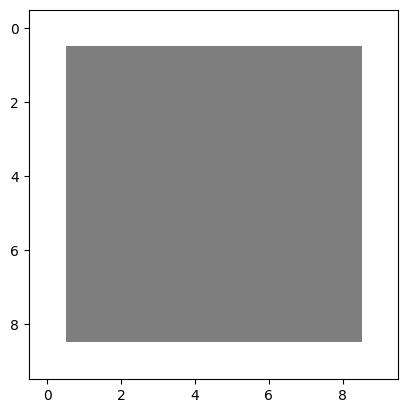

In [77]:
# test SC filter
gray0_00 = toGray(cv2.imread("Sample List Gray/sample5/gray5_22.png"), contrast=.25)
print(gray0_00)
plt.imshow(255-gray0_00, cmap='gray', vmin=0, vmax=255)
fSC0_00 = SpacialContrast(gray0_00)
print(fSC0_00)
plt.imshow(255-fSC0_00, cmap='gray', vmin=0, vmax=255)
